In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

df = pd.read_csv("./datasets/fixed_battery_log_2.csv")
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()
users

array(['Narita', 'Yusuke', 'Ayumi', 'Daiki', 'Shunya', 'Hayate',
       'Moriyama', 'Isshin'], dtype=object)

In [2]:
df.head()

,User,date,battery,state,weekday,time_to_num
0,Narita,2021-12-04 01:52:00,60,ON,5,6773
1,Narita,2021-12-04 02:22:00,73,OFF,5,8566
2,Narita,2021-12-04 07:06:00,71,ON,5,25564
3,Narita,2021-12-04 07:15:00,73,OFF,5,26105
4,Narita,2021-12-04 07:15:00,73,ON,5,26113


In [27]:
nari = pd.DataFrame(df.loc[(df["User"] == users[1]) & 
            (df["state"] == "ON") & 
                (df["date"] > dt.datetime(2021,12,1)) & 
                    (df["date"] < dt.datetime(2022,2,28))].copy()).set_index(["date"])

In [28]:
nari_BL = pd.DataFrame(nari["battery"].copy())

<AxesSubplot:xlabel='date'>

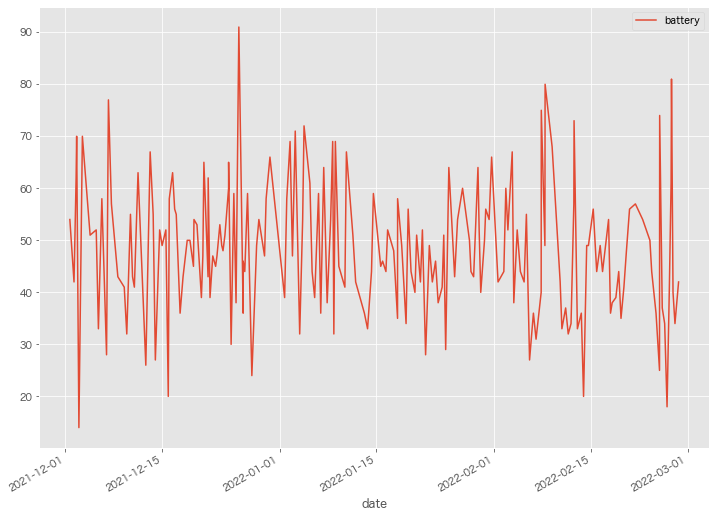

In [29]:
nari_BL.plot()

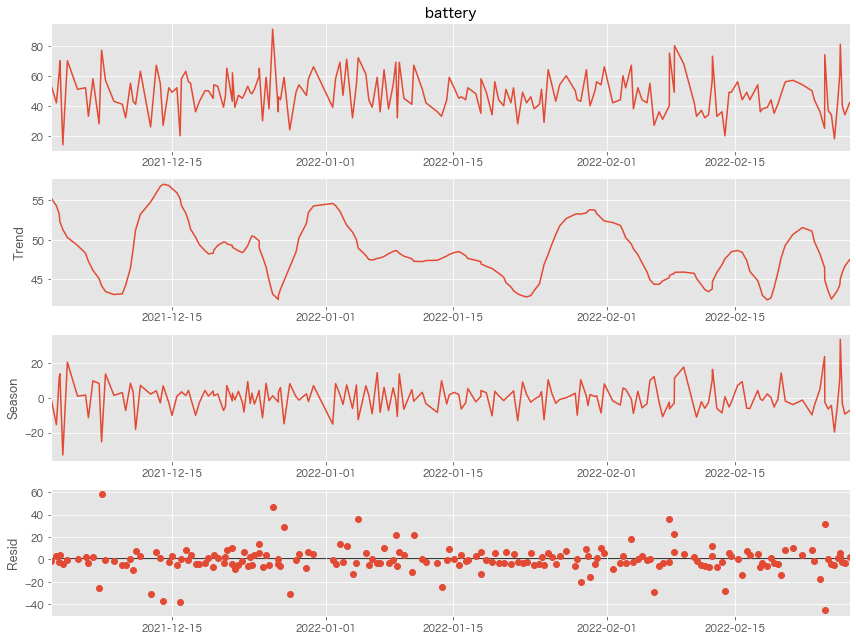

In [30]:
# 成分分解
stl=STL(nari_BL.battery, period=7, robust=True).fit()
# STL分解結果のグラフ化
stl.plot()
plt.show()

In [31]:
# ADF検定（原系列）
dftest = adfuller(nari_BL.battery)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -15.701602
p-value: 0.000000
Critical values :
	 1% -3.4646940755442612
	 5% -2.8766348847254934
	 10% -2.5748163958763994


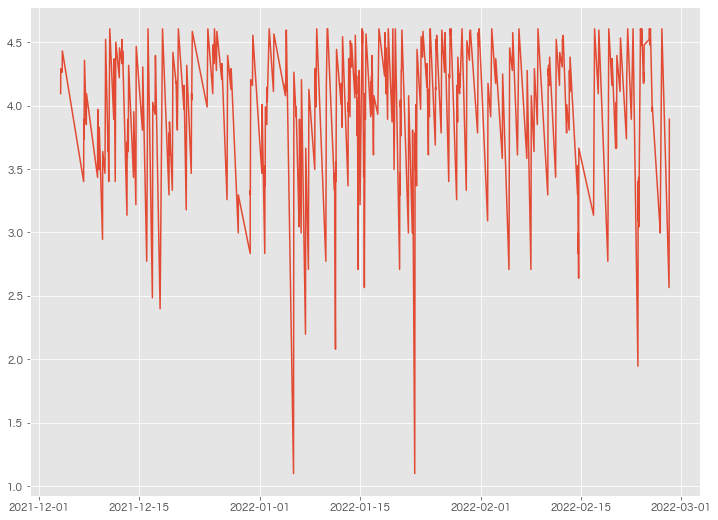

In [15]:
df_log = np.log(nari_BL.battery)
plt.plot(df_log)

In [56]:
# ADF検定（対数系列）
dftest = adfuller(df_log)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -3.975041
p-value: 0.001547
Critical values :
	 1% -3.562878534649522
	 5% -2.918973284023669
	 10% -2.597393446745562


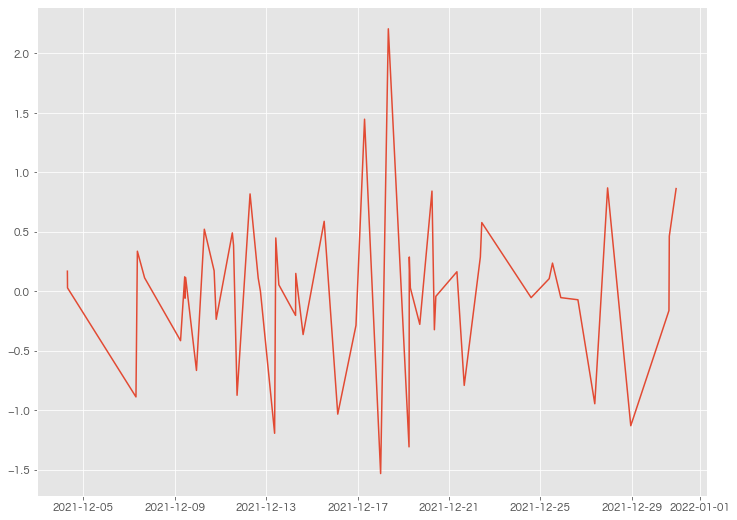

In [57]:
# 階差
df_log_diff1 = df_log.diff(1).dropna()
plt.plot(df_log_diff1)

In [58]:
# ADF検定
dftest = adfuller(df_log_diff1)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.231689
p-value: 0.000000
Critical values :
	 1% -3.5656240522121956
	 5% -2.920142229157715
	 10% -2.598014675124952


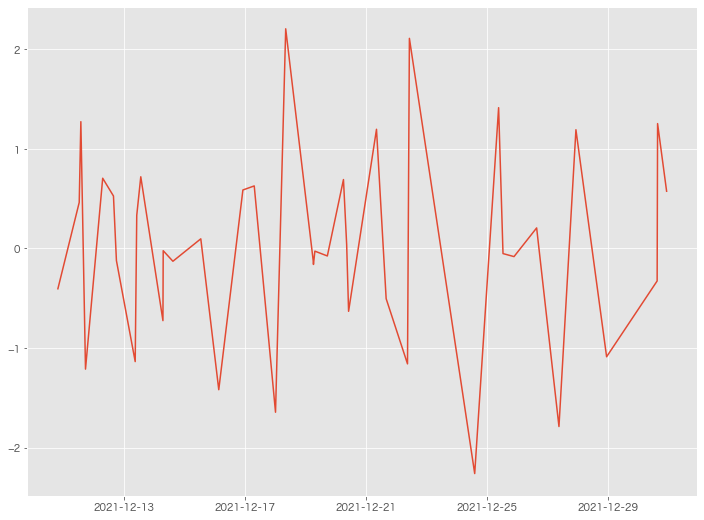

In [59]:
# 季節階差
df_log_diff1_diff12 = df_log_diff1.diff(12).dropna()
plt.plot(df_log_diff1_diff12)

In [60]:
# ADF検定
dftest = adfuller(df_log_diff1_diff12)
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -8.352561
p-value: 0.000000
Critical values :
	 1% -3.610399601308181
	 5% -2.939108945868946
	 10% -2.6080629651545038


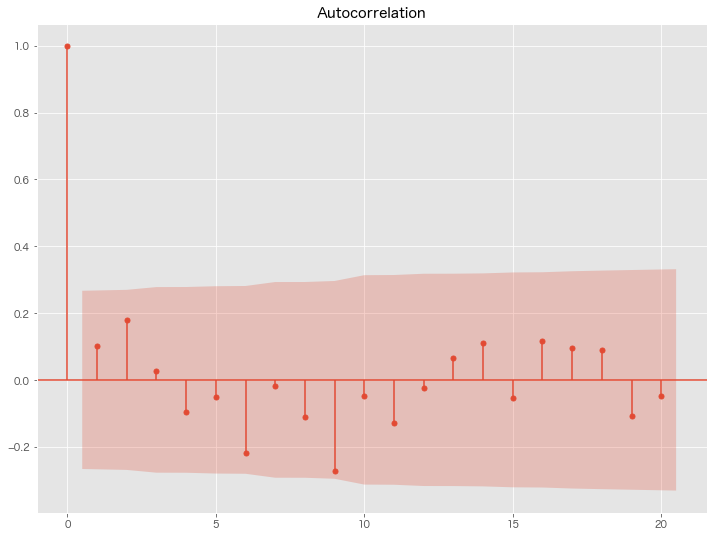

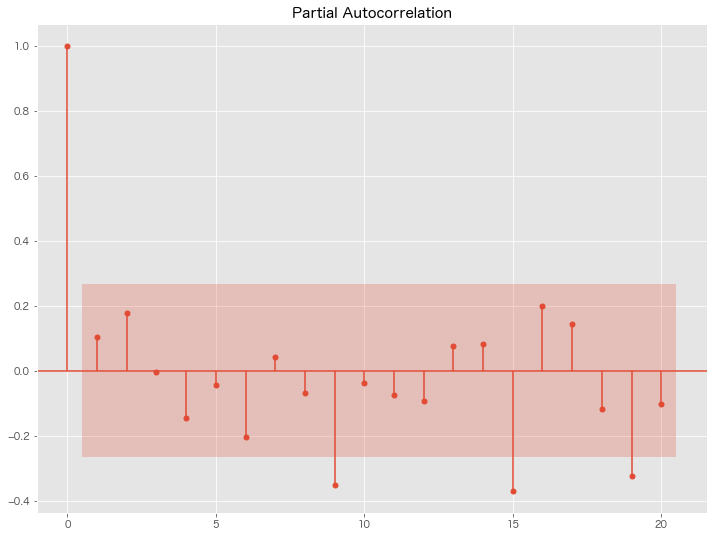

In [61]:
# 自己相関（原系列）
acf = plot_acf(nari_BL.battery, lags=20)
pacf = plot_pacf(nari_BL.battery, lags=20)

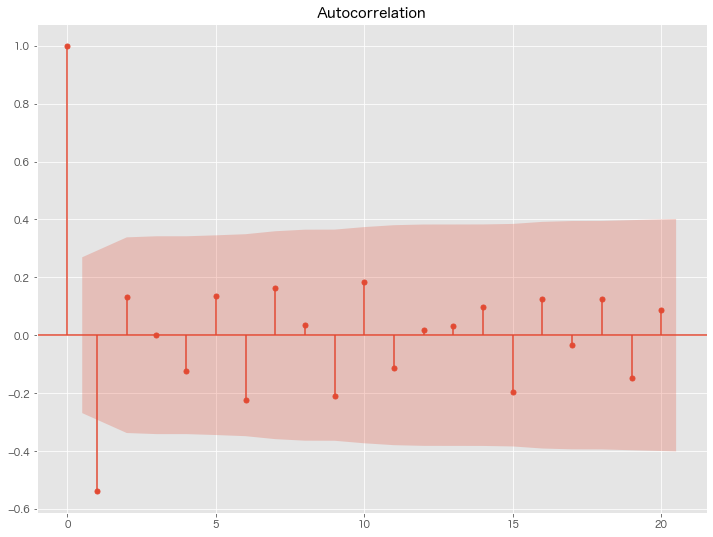

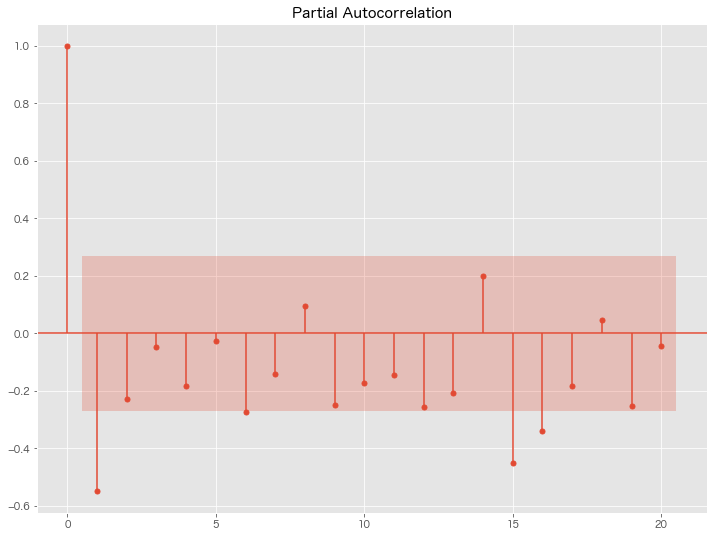

In [62]:
# 自己相関（原系列の対数系列の階差系列（次数1））
acf = plot_acf(np.diff(nari_BL.battery, 1), lags=20)
pacf = plot_pacf(np.diff(nari_BL.battery, 1), lags=20)